In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Data preprocessing

In [2]:
df = pd.read_csv('data/iris.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = df.values

x = dataset[:, 0:4].astype(float)
y = dataset[:, 4]

In [5]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
dummy_y = to_categorical(encoded_y)

Text(0, 0.5, 'Sepal width')

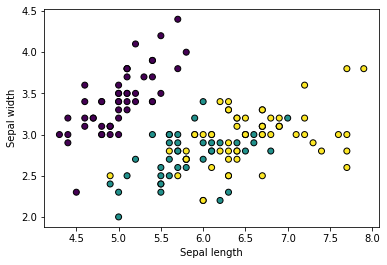

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=encoded_y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

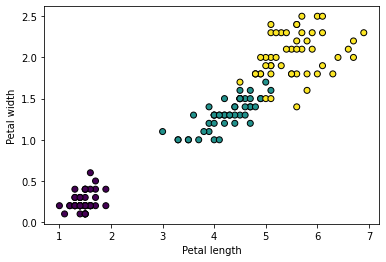

In [7]:
plt.scatter(x[:, 2], x[:, 3], c=encoded_y, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

### Create model

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x, dummy_y, test_size=0.20)

#### Ver. 1 (2 layers, 4-3 neurons)

In [9]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

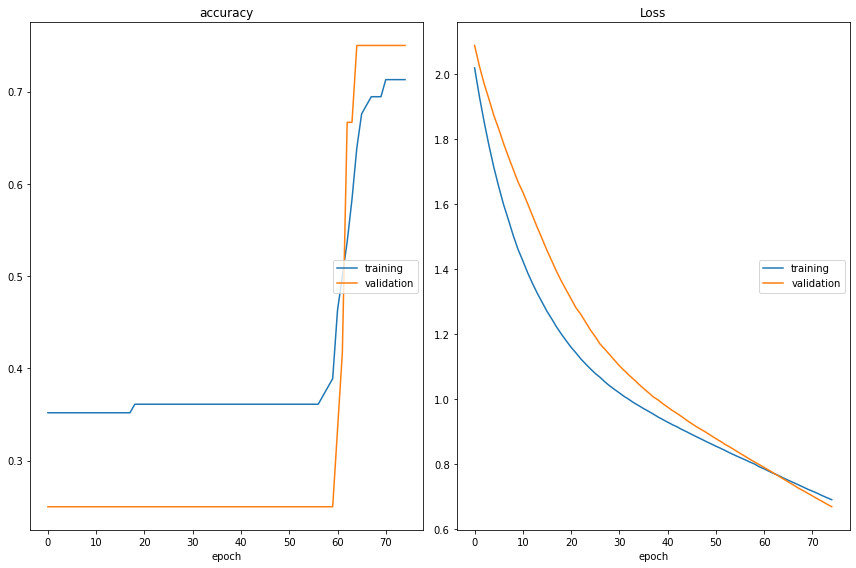

accuracy
	training         	 (min:    0.352, max:    0.713, cur:    0.713)
	validation       	 (min:    0.250, max:    0.750, cur:    0.750)
Loss
	training         	 (min:    0.690, max:    2.019, cur:    0.690)
	validation       	 (min:    0.668, max:    2.088, cur:    0.668)


In [11]:
model.fit(train_x, train_y, epochs=75, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 15ms/step - loss: 0.7060 - accuracy: 0.7000
Final test set loss: 0.705988
Final test set accuracy: 0.700000


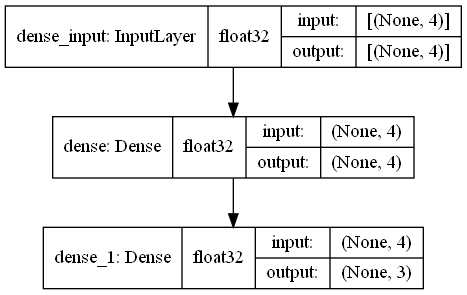

In [14]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [15]:
model.save('model-1.h5')

#### Ver. 2 (3 layers, 4-10-3 neurons)

In [16]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

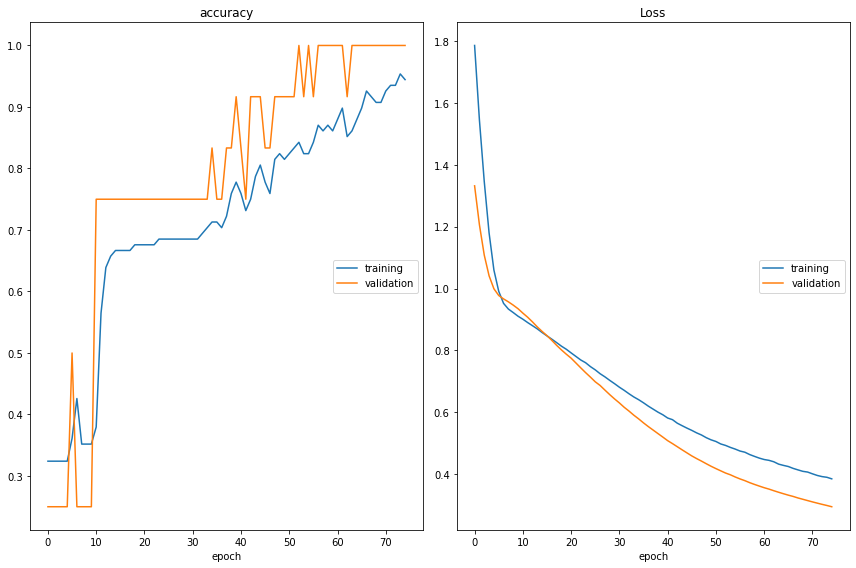

accuracy
	training         	 (min:    0.324, max:    0.954, cur:    0.944)
	validation       	 (min:    0.250, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.385, max:    1.786, cur:    0.385)
	validation       	 (min:    0.295, max:    1.332, cur:    0.295)


In [18]:
model.fit(train_x, train_y, epochs=75, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 20ms/step - loss: 0.3917 - accuracy: 0.9333
Final test set loss: 0.391730
Final test set accuracy: 0.933333


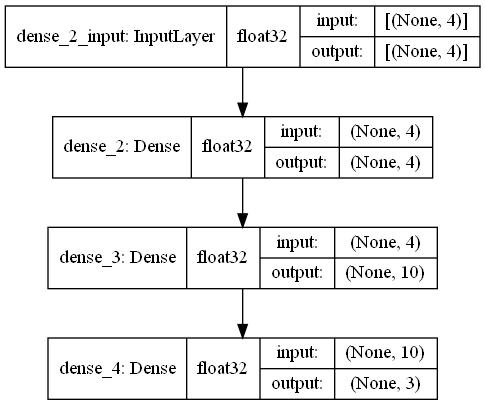

In [21]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [22]:
model.save('model-2.h5')

#### Ver. 3 (5 layers, 4-20-20-20-3 neurons)

In [23]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

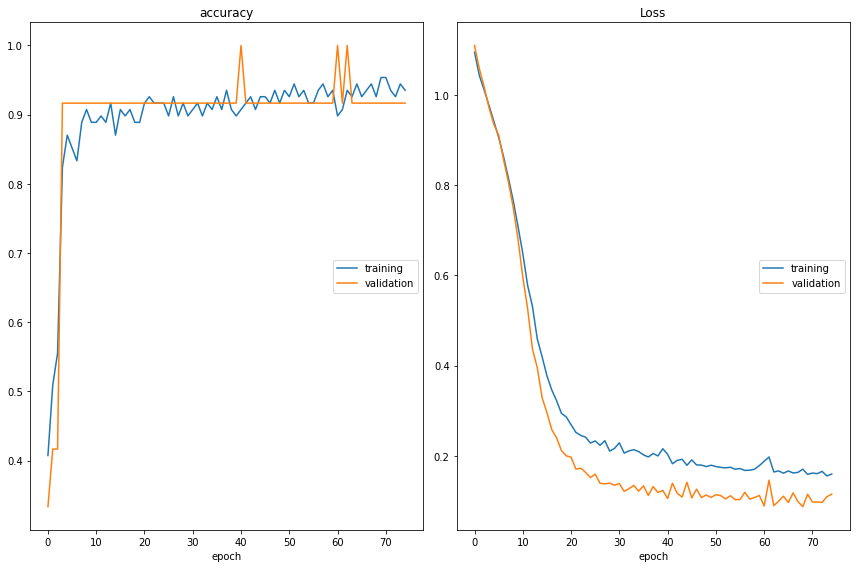

accuracy
	training         	 (min:    0.407, max:    0.954, cur:    0.935)
	validation       	 (min:    0.333, max:    1.000, cur:    0.917)
Loss
	training         	 (min:    0.155, max:    1.095, cur:    0.160)
	validation       	 (min:    0.087, max:    1.110, cur:    0.115)


In [25]:
model.fit(train_x, train_y, epochs=75, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 63        
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 19ms/step - loss: 0.0829 - accuracy: 0.9667
Final test set loss: 0.082907
Final test set accuracy: 0.966667


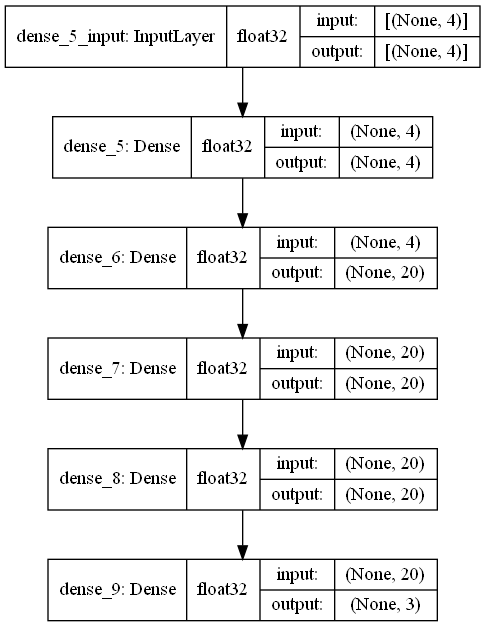

In [28]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [29]:
model.save('model-3.h5')

#### Ver. 4 (3 layers, 4-10-3 neurons, batch size 15, epochs 100)

In [38]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

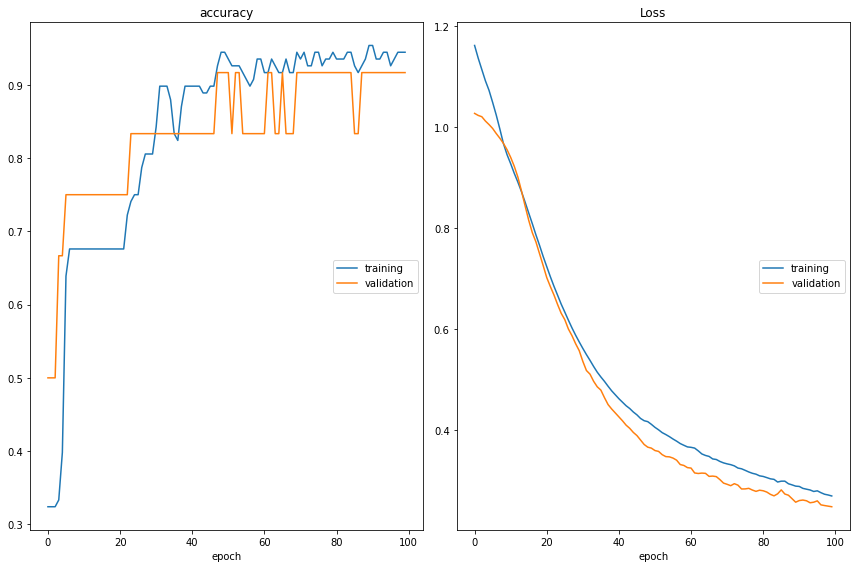

accuracy
	training         	 (min:    0.324, max:    0.954, cur:    0.944)
	validation       	 (min:    0.500, max:    0.917, cur:    0.917)
Loss
	training         	 (min:    0.269, max:    1.161, cur:    0.269)
	validation       	 (min:    0.248, max:    1.026, cur:    0.248)


In [40]:
model.fit(train_x, train_y, epochs=100, batch_size=15, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [41]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 33        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 21ms/step - loss: 0.2802 - accuracy: 1.0000
Final test set loss: 0.280170
Final test set accuracy: 1.000000


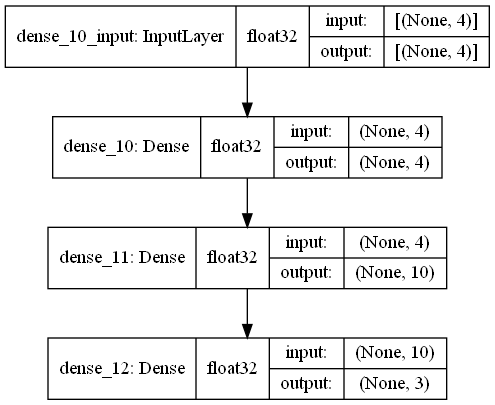

In [35]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [22]:
model.save('model-4.h5')